# Methylation level of CpGs 
trying to troubleshoot CpG boxplot issue that I noticed on 03/20/2025

first re-ran multicov files - ran on all the bam files but also generated multicov matrices for each treatment combination (so the replicates are in the same file) in case there's problems with trying to assign oysters

### 0. loading libraries

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### 1. loading treatment CSVs

These files were generated with the script `bedtools_CG_byTreatment.txt` in my troubleshooting dir outside of the repo project dir. 

In [4]:
# control control
cc_mc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/troubleshooting_03202025/CC_CG_motif_multicov.csv', sep = '\t')
head(cc_mc)

# hypoxic control
hc_mc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/troubleshooting_03202025/HC_CG_motif_multicov.csv', sep = '\t')

# control hypoxic 
ch_mc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/troubleshooting_03202025/CH_CG_motif_multicov.csv', sep = '\t')

# hypoxic hypoxic 
hh_mc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/troubleshooting_03202025/HH_CG_motif_multicov.csv', sep = '\t')

,NC_035780.1,X28,X30,CG_motif,X0,X0.1,X0.2,X0.3,X0.4
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


In [5]:
head(cc_mc)
head(hc_mc)
head(ch_mc)
head(hh_mc)

,NC_035780.1,X28,X30,CG_motif,X0,X0.1,X0.2,X0.3,X0.4
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,NC_035780.1,X28,X30,CG_motif,X0,X0.1,X0.2,X0.3,X0.4
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,NC_035780.1,X28,X30,CG_motif,X0,X0.1,X0.2,X0.3,X0.4
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


,NC_035780.1,X28,X30,CG_motif,X0,X0.1,X0.2,X0.3,X0.4
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,54,56,CG_motif,0,0,0,0,0
2,NC_035780.1,75,77,CG_motif,0,0,0,0,0
3,NC_035780.1,93,95,CG_motif,0,0,0,0,0
4,NC_035780.1,103,105,CG_motif,0,0,0,0,0
5,NC_035780.1,116,118,CG_motif,0,0,0,0,0
6,NC_035780.1,134,136,CG_motif,0,0,0,0,0


In [6]:
# total number of CpGs in the CV genome
total_cpg <- dim(cc_mc)[1]
total_cpg

[1] 14458702

### 2. calculate methylation level
for simplification of code, created a function to run on each treatment matrix

the code reads in the df, counts the number of methylated CpGs for each replicate and calculates the methylation level (# methylated CpGs / total CpGs * 100)

In [9]:
# create function to run on each treatment matrix

format <- function(file, treatment) {
  file %>%
    # select cols of counts data for each oyster
    select(5:9) %>%
    
    # count number of rows for each column with a count of at least 5
    colSums(. >= 5) %>%
    
    # create df
    as.data.frame() %>%
    
    # add col for sample IDs
    rownames_to_column("sampleID") %>%
    
    # add treatment info for merging
    mutate(treatment = treatment) %>%
    
    # rename middle column
    rename(methyl_count = 2) %>%
    
    # calc methyl level
    mutate(methyl_level = round(methyl_count/total_cpg * 100, 2))
    
}

In [36]:
format <- function(file, treatment) {
  file %>%
    select(5:9) %>%
    summarise(across(everything(), ~ sum(.x >= 5))) %>%
    pivot_longer(everything(), names_to = "col_name", values_to = "methyl_count") %>%
    mutate(treatment = treatment) %>%
    mutate(total_cpg = nrow(file)) %>%
    mutate(methyl_level = round(methyl_count / total_cpg * 100, 2))
}

In [37]:
CC <- format(cc_mc, 'CC')
CC

HC <- format(hc_mc, 'HC')
HC

CH <- format(ch_mc, 'CH')
CH

HH <- format(hh_mc, 'HH')
HH

col_name,methyl_count,treatment,total_cpg,methyl_level
<chr>,<int>,<chr>,<int>,<dbl>
X0,147798,CC,14458702,1.02
X0.1,59287,CC,14458702,0.41
X0.2,137931,CC,14458702,0.95
X0.3,81789,CC,14458702,0.57
X0.4,33975,CC,14458702,0.23


col_name,methyl_count,treatment,total_cpg,methyl_level
<chr>,<int>,<chr>,<int>,<dbl>
X0,138394,HC,14458702,0.96
X0.1,136261,HC,14458702,0.94
X0.2,149013,HC,14458702,1.03
X0.3,136293,HC,14458702,0.94
X0.4,67842,HC,14458702,0.47


col_name,methyl_count,treatment,total_cpg,methyl_level
<chr>,<int>,<chr>,<int>,<dbl>
X0,140077,CH,14458702,0.97
X0.1,24101,CH,14458702,0.17
X0.2,73538,CH,14458702,0.51
X0.3,136233,CH,14458702,0.94
X0.4,104170,CH,14458702,0.72


col_name,methyl_count,treatment,total_cpg,methyl_level
<chr>,<int>,<chr>,<int>,<dbl>
X0,132674,HH,14458702,0.92
X0.1,105032,HH,14458702,0.73
X0.2,104681,HH,14458702,0.72
X0.3,134384,HH,14458702,0.93
X0.4,129732,HH,14458702,0.90


In [38]:
# merge all dfs into one
cpg_meLevel <- rbind(CC, HC, CH, HH)

# add phase 1 and 2 info based on treatment code
cpg_meLevel$phase1 <- ifelse(substr(cpg_meLevel$treatment, 1, 1) == "C", "Control", "Hypoxic")
cpg_meLevel$phase2 <- ifelse(substr(cpg_meLevel$treatment, 2, 2) == "C", "Control", "Hypoxic")

cpg_meLevel

col_name,methyl_count,treatment,total_cpg,methyl_level,phase1,phase2
<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>
X0,147798,CC,14458702,1.02,Control,Control
X0.1,59287,CC,14458702,0.41,Control,Control
X0.2,137931,CC,14458702,0.95,Control,Control
X0.3,81789,CC,14458702,0.57,Control,Control
X0.4,33975,CC,14458702,0.23,Control,Control
X0,138394,HC,14458702,0.96,Hypoxic,Control
X0.1,136261,HC,14458702,0.94,Hypoxic,Control
X0.2,149013,HC,14458702,1.03,Hypoxic,Control
X0.3,136293,HC,14458702,0.94,Hypoxic,Control


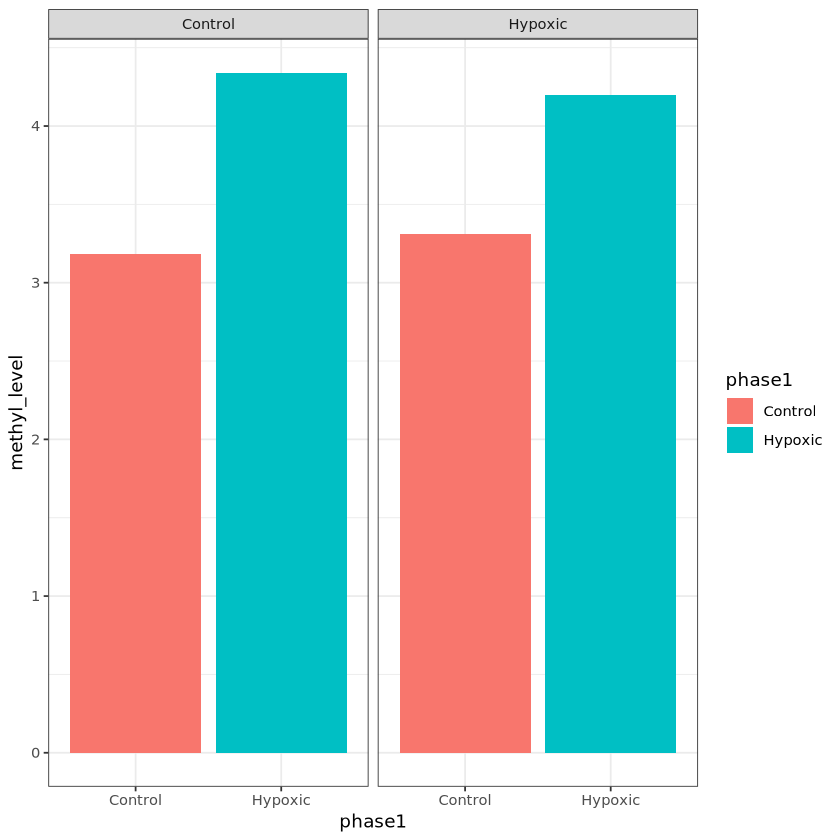

In [48]:
ggplot(cpg_meLevel, aes(x=phase1, y=methyl_level, fill=phase1)) +
       geom_bar(stat = 'identity') +
       facet_wrap(~phase2) +
geom_errorbar(aes(ymax = mean_methyl_level + se_methyl_level,
                       ymin = mean_methyl_level - se_methyl_level),
                  width = 0.2, size = 0.5) +
       theme_bw()

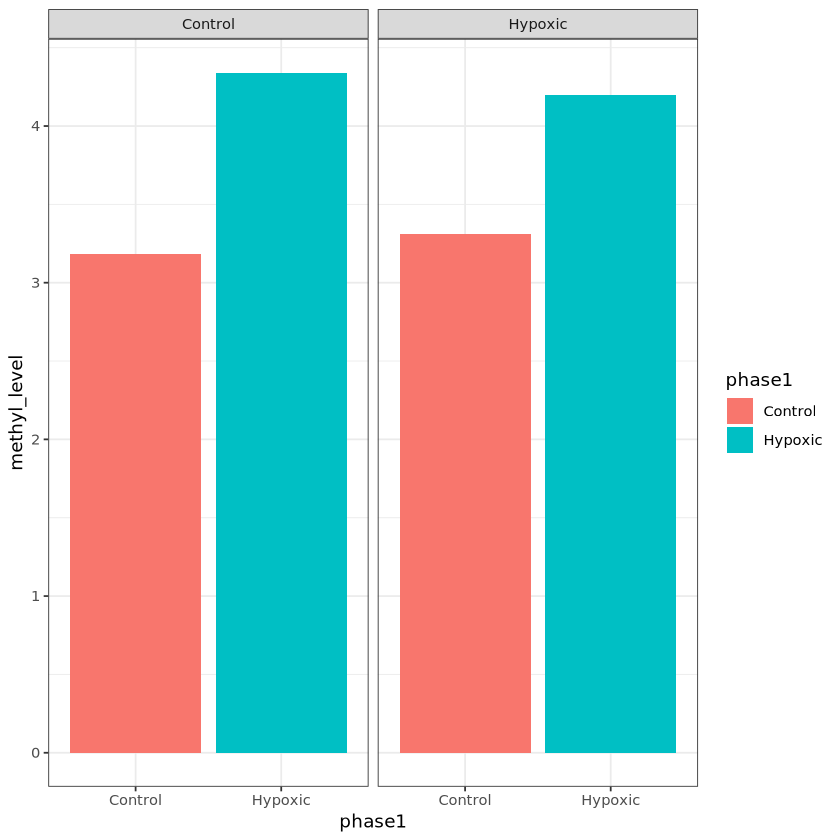

In [48]:
ggplot(cpg_meLevel, aes(x=phase1, y=methyl_level, fill=phase1)) +
       geom_bar(stat = 'identity') +
       facet_wrap(~phase2) +
geom_errorbar(aes(ymax = mean_methyl_level + se_methyl_level,
                       ymin = mean_methyl_level - se_methyl_level),
                  width = 0.2, size = 0.5) +
       theme_bw()

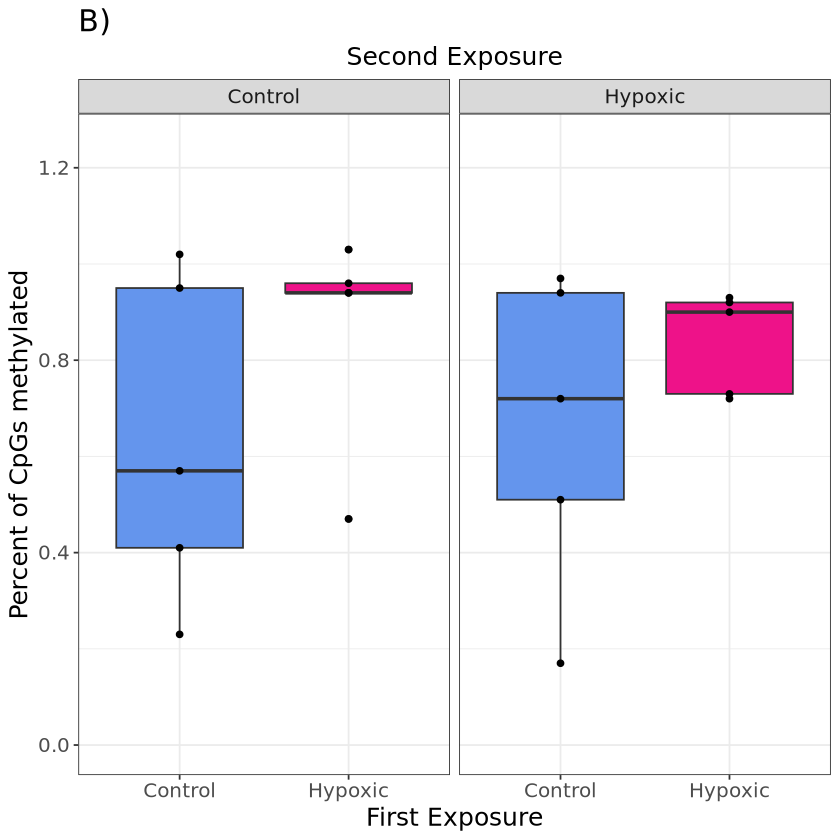

In [49]:
cpgBoxplot <- ggplot(cpg_meLevel, aes(x = phase1, y = methyl_level, fill = phase1)) +
  geom_boxplot() +
  geom_point() +
  facet_wrap(~ phase2) +
  scale_fill_manual(values=c('cornflowerblue', 'deeppink2')) +
  guides(fill = 'none') +
ylim(0, 1.25) +
  labs(x = "First Exposure", 
       y = "Percent of CpGs methylated",
       title = 'B)',
       subtitle = "Second Exposure") +
  theme_bw() +
  theme(text = element_text(size = 15), plot.subtitle = element_text(hjust=0.5))

cpgBoxplot

In [45]:
model <- aov(methyl_level ~ phase1 * phase2, data = cpg_meLevel)
summary(model)

              Df Sum Sq Mean Sq F value Pr(>F)
phase1         1 0.2101 0.21012   2.911  0.107
phase2         1 0.0000 0.00000   0.000  0.993
phase1:phase2  1 0.0036 0.00365   0.050  0.825
Residuals     16 1.1551 0.07219               

## Genes
I'm guessing we see the same patterns but I'm curious what this looks like for genes instead of CpGs - better able to make connections with the volcano DMG plots?

In [50]:
# control control
cc_mc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/troubleshooting_03202025/gene_multicov/CC_gene_multicov.csv', sep = '\t')
head(cc_mc)

# hypoxic control
hc_mc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/troubleshooting_03202025/gene_multicov/HC_gene_multicov.csv', sep = '\t')

# control hypoxic 
ch_mc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/troubleshooting_03202025/gene_multicov/CH_gene_multicov.csv', sep = '\t')

# hypoxic hypoxic 
hh_mc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_methyl_assembly/assembly_pipeline_files/genomic_bed_files/troubleshooting_03202025/gene_multicov/HH_gene_multicov.csv', sep = '\t')

,NC_035780.1,X13578,X14594,X0,X0.1,X0.2,X0.3,X0.4
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,28961,33324,0,0,0,0,0
2,NC_035780.1,43111,66897,0,0,4,0,0
3,NC_035780.1,85606,95254,2,0,4,6,0
4,NC_035780.1,99840,106460,6,0,4,2,0
5,NC_035780.1,108305,110077,0,0,0,0,0
6,NC_035780.1,151859,157536,0,0,0,0,0


In [51]:
head(cc_mc)
head(hc_mc)
head(ch_mc)
head(hh_mc)

,NC_035780.1,X13578,X14594,X0,X0.1,X0.2,X0.3,X0.4
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,28961,33324,0,0,0,0,0
2,NC_035780.1,43111,66897,0,0,4,0,0
3,NC_035780.1,85606,95254,2,0,4,6,0
4,NC_035780.1,99840,106460,6,0,4,2,0
5,NC_035780.1,108305,110077,0,0,0,0,0
6,NC_035780.1,151859,157536,0,0,0,0,0


,NC_035780.1,X13578,X14594,X0,X0.1,X0.2,X0.3,X0.4
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,28961,33324,0,0,0,2,0
2,NC_035780.1,43111,66897,0,0,0,0,0
3,NC_035780.1,85606,95254,8,12,6,4,2
4,NC_035780.1,99840,106460,14,4,6,0,0
5,NC_035780.1,108305,110077,0,0,0,0,0
6,NC_035780.1,151859,157536,4,0,0,0,0


,NC_035780.1,X13578,X14594,X0,X0.1,X0.2,X0.3,X0.4
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,28961,33324,0,0,0,0,0
2,NC_035780.1,43111,66897,0,0,2,2,0
3,NC_035780.1,85606,95254,1,0,0,0,10
4,NC_035780.1,99840,106460,2,0,0,0,2
5,NC_035780.1,108305,110077,0,0,0,0,0
6,NC_035780.1,151859,157536,0,0,0,0,0


,NC_035780.1,X13578,X14594,X0,X0.1,X0.2,X0.3,X2
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_035780.1,28961,33324,0,0,0,0,0
2,NC_035780.1,43111,66897,0,0,2,0,0
3,NC_035780.1,85606,95254,0,0,0,0,2
4,NC_035780.1,99840,106460,2,0,0,0,2
5,NC_035780.1,108305,110077,0,0,0,0,0
6,NC_035780.1,151859,157536,0,0,0,0,2


In [53]:
# total number of gene in the CV genome
total_gene <- dim(cc_mc)[1]
total_gene

[1] 38261

### 2. calculate methylation level
for simplification of code, created a function to run on each treatment matrix

the code reads in the df, counts the number of methylated CpGs for each replicate and calculates the methylation level (# methylated CpGs / total CpGs * 100)

In [57]:
format <- function(file, treatment) {
  file %>%
    select(4:8) %>%
    summarise(across(everything(), ~ sum(.x >= 5))) %>%
    pivot_longer(everything(), names_to = "col_name", values_to = "methyl_count") %>%
    mutate(treatment = treatment) %>%
    mutate(total_cpg = nrow(file)) %>%
    mutate(methyl_level = round(methyl_count / total_gene * 100, 2))
}

In [58]:
CC <- format(cc_mc, 'CC')
CC

HC <- format(hc_mc, 'HC')
HC

CH <- format(ch_mc, 'CH')
CH

HH <- format(hh_mc, 'HH')
HH

col_name,methyl_count,treatment,total_cpg,methyl_level
<chr>,<int>,<chr>,<int>,<dbl>
X0,14127,CC,38261,36.92
X0.1,9378,CC,38261,24.51
X0.2,14142,CC,38261,36.96
X0.3,11122,CC,38261,29.07
X0.4,7322,CC,38261,19.14


col_name,methyl_count,treatment,total_cpg,methyl_level
<chr>,<int>,<chr>,<int>,<dbl>
X0,13795,HC,38261,36.05
X0.1,13641,HC,38261,35.65
X0.2,14319,HC,38261,37.42
X0.3,13620,HC,38261,35.60
X0.4,10401,HC,38261,27.18


col_name,methyl_count,treatment,total_cpg,methyl_level
<chr>,<int>,<chr>,<int>,<dbl>
X0,13820,CH,38261,36.12
X0.1,5965,CH,38261,15.59
X0.2,10170,CH,38261,26.58
X0.3,13832,CH,38261,36.15
X0.4,12177,CH,38261,31.83


col_name,methyl_count,treatment,total_cpg,methyl_level
<chr>,<int>,<chr>,<int>,<dbl>
X0,13655,HH,38261,35.69
X0.1,12228,HH,38261,31.96
X0.2,12415,HH,38261,32.45
X0.3,13794,HH,38261,36.05
X2,13621,HH,38261,35.60


In [59]:
# merge all dfs into one
gene_meLevel <- rbind(CC, HC, CH, HH)

# add phase 1 and 2 info based on treatment code
gene_meLevel$phase1 <- ifelse(substr(gene_meLevel$treatment, 1, 1) == "C", "Control", "Hypoxic")
gene_meLevel$phase2 <- ifelse(substr(gene_meLevel$treatment, 2, 2) == "C", "Control", "Hypoxic")

gene_meLevel

col_name,methyl_count,treatment,total_cpg,methyl_level,phase1,phase2
<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>
X0,14127,CC,38261,36.92,Control,Control
X0.1,9378,CC,38261,24.51,Control,Control
X0.2,14142,CC,38261,36.96,Control,Control
X0.3,11122,CC,38261,29.07,Control,Control
X0.4,7322,CC,38261,19.14,Control,Control
X0,13795,HC,38261,36.05,Hypoxic,Control
X0.1,13641,HC,38261,35.65,Hypoxic,Control
X0.2,14319,HC,38261,37.42,Hypoxic,Control
X0.3,13620,HC,38261,35.60,Hypoxic,Control


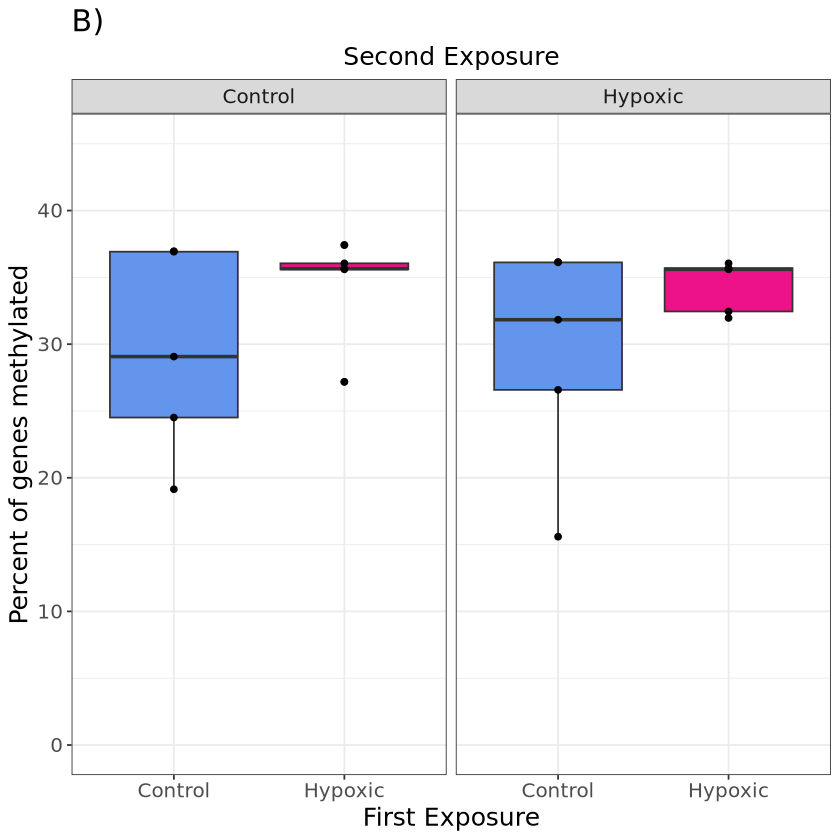

In [70]:

cpgBoxplot <- ggplot(gene_meLevel, aes(x = phase1, y = methyl_level, fill = phase1)) +
  geom_boxplot() +
  geom_point() +
  facet_wrap(~ phase2) +
  scale_fill_manual(values=c('cornflowerblue', 'deeppink2')) +
  guides(fill = 'none') +
ylim(0, 45) +
  labs(x = "First Exposure", 
       y = "Percent of genes methylated",
       title = 'B)',
       subtitle = "Second Exposure") +
  theme_bw() +
  theme(text = element_text(size = 15), plot.subtitle = element_text(hjust=0.5))

cpgBoxplot

In [73]:
gene_meLevel

col_name,methyl_count,treatment,total_cpg,methyl_level,phase1,phase2
<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<chr>
X0,14127,CC,38261,36.92,Control,Control
X0.1,9378,CC,38261,24.51,Control,Control
X0.2,14142,CC,38261,36.96,Control,Control
X0.3,11122,CC,38261,29.07,Control,Control
X0.4,7322,CC,38261,19.14,Control,Control
X0,13795,HC,38261,36.05,Hypoxic,Control
X0.1,13641,HC,38261,35.65,Hypoxic,Control
X0.2,14319,HC,38261,37.42,Hypoxic,Control
X0.3,13620,HC,38261,35.60,Hypoxic,Control


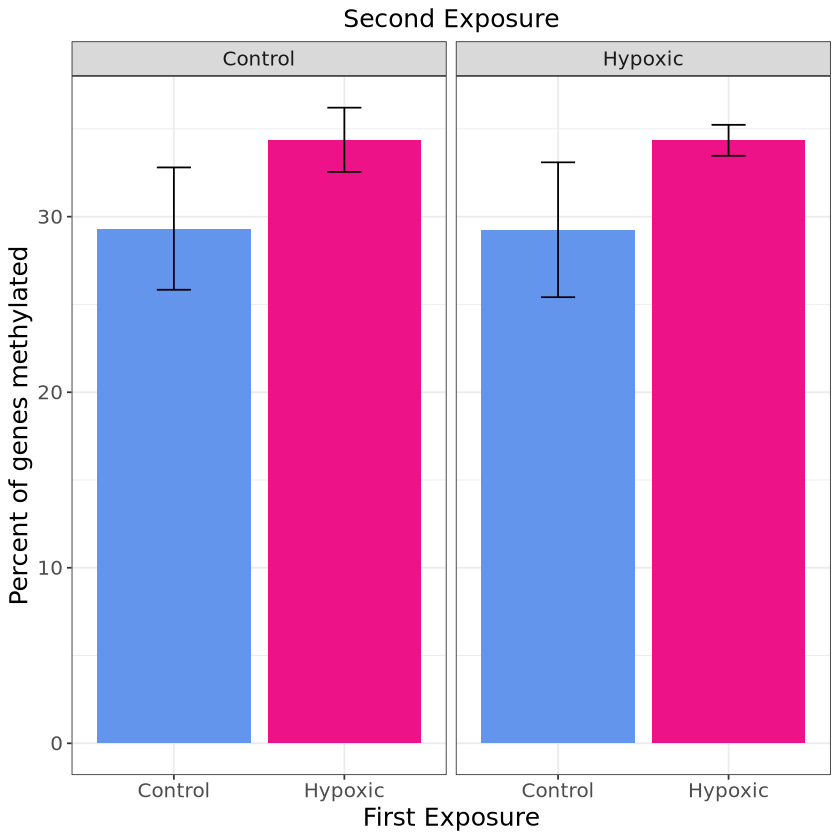

In [91]:
df_summary <- gene_meLevel %>%
  group_by(treatment) %>%
  summarise(
    mean_methyl_level = mean(methyl_level),
    sd_methyl_level = sd(methyl_level),
    se_methyl_level = sd_methyl_level / sqrt(n())
  ) 

df_summary$phase1 <- ifelse(substr(df_summary$treatment, 1, 1) == "C", "Control", "Hypoxic")
df_summary$phase2 <- ifelse(substr(df_summary$treatment, 2, 2) == "C", "Control", "Hypoxic")


# Create a bar plot with error bars
geneMe_barplot <- ggplot(df_summary, aes(x = phase1, y = mean_methyl_level, fill = phase1)) +
  geom_bar(stat = "identity") +
  geom_errorbar(aes(ymax = mean_methyl_level + se_methyl_level,
                       ymin = mean_methyl_level - se_methyl_level),
                  width = 0.2, size = 0.5) +
facet_wrap(~phase2) +
#scale_fill_brewer(palette = "RdPu", direction = 1) +
scale_fill_manual(values=c('cornflowerblue','deeppink2')) +
guides(fill = FALSE) +
  labs(x = "First Exposure", 
       y = "Percent of genes methylated",
      subtitle = 'Second Exposure') +
  theme_bw() + 
theme(text = element_text(size = 15), plot.subtitle = element_text(hjust=0.5))

geneMe_barplot

In [89]:
gene.aov <- aov(data = gene_meLevel,
    methyl_level ~ phase1 * phase2)

summary(gene.aov)

              Df Sum Sq Mean Sq F value Pr(>F)  
phase1         1  128.9  128.93   3.324  0.087 .
phase2         1    0.0    0.01   0.000  0.986  
phase1:phase2  1    0.0    0.00   0.000  0.995  
Residuals     16  620.7   38.79                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1